In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
from pyampute.ampute import MultivariateAmputation
from pyampute.exploration.md_patterns import mdPatterns

## Prepare original data

In [2]:
# Load datasets
boston = pd.read_csv("../../data/toy-dataset/Boston.csv", index_col=0)
biopsy = pd.read_csv("../../data/toy-dataset/biopsy.csv", index_col=0)

In [3]:
# Perform one hot encoding
boston = pd.get_dummies(boston, columns=["rad"], drop_first=True)
biopsy = pd.get_dummies(biopsy, columns=["class"], drop_first=True)

In [4]:
# Select variables to be retained
# Some variables in the data are partially missing or non-numeric
# (both not accepted by pyampute)

boston_vars = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", 
               "tax", "ptratio", "black", "lstat", "medv"]
#boston_other_vars = []

biopsy_vars = ["V1", "V2", "V3", "V4", "V5", "V7", "V8", "V9", 
               "class_malignant"]
#biopsy_other_vars = []

# Create new data frames

boston0 = boston[boston_vars]
#bostonoth = boston[boston_other_vars]

biopsy0 = biopsy[biopsy_vars]
#biopsyoth = biopsy[biopsy_other_vars]

## Perform data amputation (MAR)

### General setup

In [5]:
# Set random seed
SEED = 2023

# Set prop of missing values to be constructed
props = [.1, .2, .3, .4, .5]

### `boston` dataset

In [7]:
# Create general missingness setup
boston_amp_pattern = [
    {"incomplete_vars": ["chas"], "mechanism": "MAR"},
    {"incomplete_vars": ["nox"], "mechanism": "MAR"},
]

In [8]:
# Create data with different levels of missingness
amputed_boston = {}

for p in props:
    # Initialise amputer
    bosamp = MultivariateAmputation(prop=p, seed=SEED, 
                                    patterns=boston_amp_pattern)
    
    # Perform multivariate amputation and store data frame
    amputed_boston[p] = bosamp.fit_transform(boston0)

2023-08-18 18:01:05,774 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2023-08-18 18:01:05,781 [WARNING] Binary variables (at indices [3]) are indicated to be used in amputation (they are weighted and will be used to calculate the weighted sum score under MAR, MNAR, or MAR+MNAR). This can result in a subset with candidates that all have the same (or almost the same) weighted sum scores. 
2023-08-18 18:01:05,813 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2023-08-18 18:01:05,816 [WARNING] Binary variables (at indices [3]) are indicated to be used in amputation (they a

Missing rate = 0.1



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


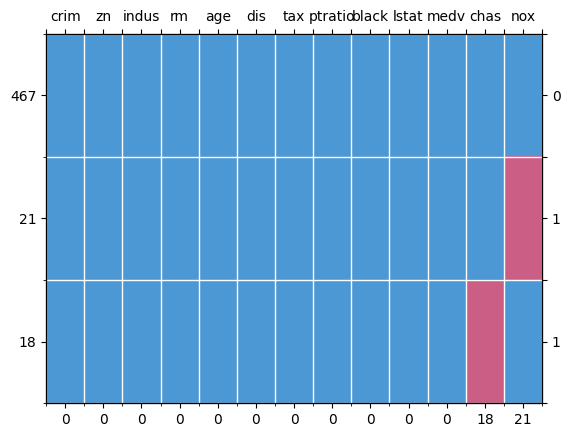

                         row_count  crim  zn  indus  rm  age  dis  tax  \
rows_no_missing                467     1   1      1   1    1    1    1   
1                               21     1   1      1   1    1    1    1   
2                               18     1   1      1   1    1    1    1   
n_missing_values_per_col               0   0      0   0    0    0    0   

                          ptratio  black  lstat  medv  chas  nox  \
rows_no_missing                 1      1      1     1     1    1   
1                               1      1      1     1     1    0   
2                               1      1      1     1     0    1   
n_missing_values_per_col        0      0      0     0    18   21   

                          n_missing_values  
rows_no_missing                          0  
1                                        1  
2                                        1  
n_missing_values_per_col                39  



Missing rate = 0.2



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


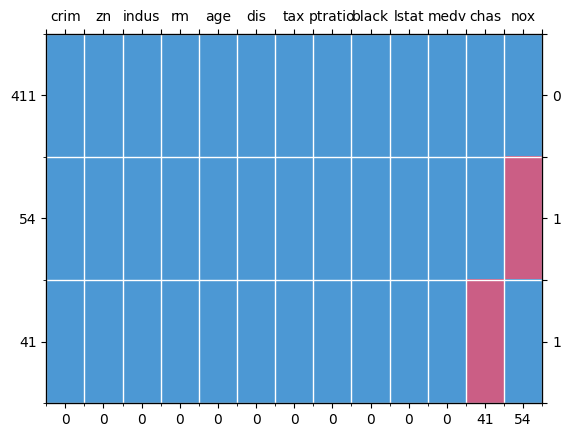

                         row_count  crim  zn  indus  rm  age  dis  tax  \
rows_no_missing                411     1   1      1   1    1    1    1   
1                               54     1   1      1   1    1    1    1   
2                               41     1   1      1   1    1    1    1   
n_missing_values_per_col               0   0      0   0    0    0    0   

                          ptratio  black  lstat  medv  chas  nox  \
rows_no_missing                 1      1      1     1     1    1   
1                               1      1      1     1     1    0   
2                               1      1      1     1     0    1   
n_missing_values_per_col        0      0      0     0    41   54   

                          n_missing_values  
rows_no_missing                          0  
1                                        1  
2                                        1  
n_missing_values_per_col                95  



Missing rate = 0.3



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


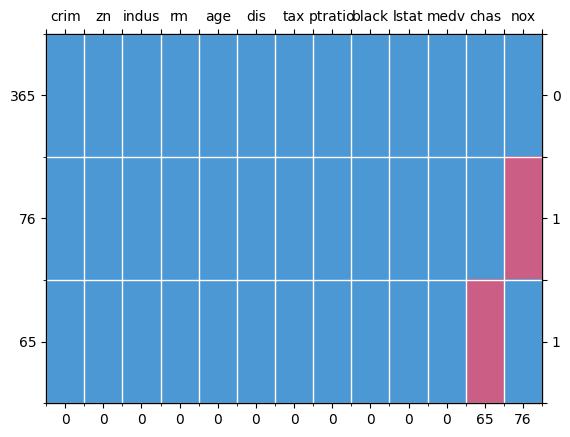

                         row_count  crim  zn  indus  rm  age  dis  tax  \
rows_no_missing                365     1   1      1   1    1    1    1   
1                               76     1   1      1   1    1    1    1   
2                               65     1   1      1   1    1    1    1   
n_missing_values_per_col               0   0      0   0    0    0    0   

                          ptratio  black  lstat  medv  chas  nox  \
rows_no_missing                 1      1      1     1     1    1   
1                               1      1      1     1     1    0   
2                               1      1      1     1     0    1   
n_missing_values_per_col        0      0      0     0    65   76   

                          n_missing_values  
rows_no_missing                          0  
1                                        1  
2                                        1  
n_missing_values_per_col               141  



Missing rate = 0.4



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


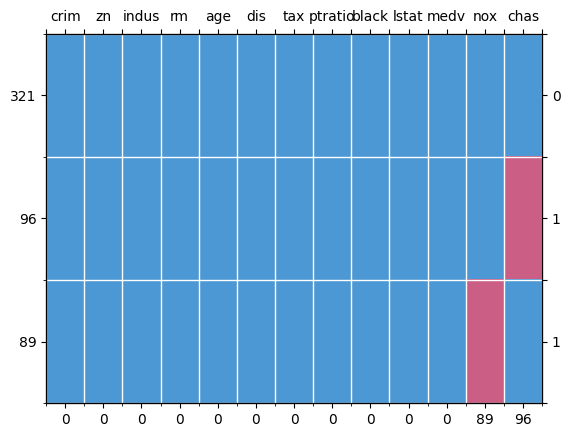

                         row_count  crim  zn  indus  rm  age  dis  tax  \
rows_no_missing                321     1   1      1   1    1    1    1   
1                               96     1   1      1   1    1    1    1   
2                               89     1   1      1   1    1    1    1   
n_missing_values_per_col               0   0      0   0    0    0    0   

                          ptratio  black  lstat  medv  nox  chas  \
rows_no_missing                 1      1      1     1    1     1   
1                               1      1      1     1    1     0   
2                               1      1      1     1    0     1   
n_missing_values_per_col        0      0      0     0   89    96   

                          n_missing_values  
rows_no_missing                          0  
1                                        1  
2                                        1  
n_missing_values_per_col               185  



Missing rate = 0.5



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


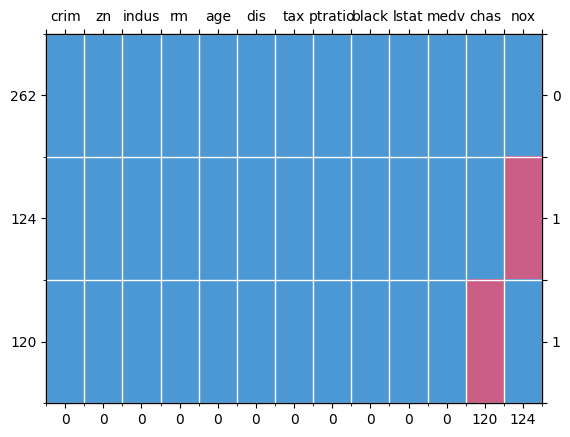

                         row_count  crim  zn  indus  rm  age  dis  tax  \
rows_no_missing                262     1   1      1   1    1    1    1   
1                              124     1   1      1   1    1    1    1   
2                              120     1   1      1   1    1    1    1   
n_missing_values_per_col               0   0      0   0    0    0    0   

                          ptratio  black  lstat  medv  chas  nox  \
rows_no_missing                 1      1      1     1     1    1   
1                               1      1      1     1     1    0   
2                               1      1      1     1     0    1   
n_missing_values_per_col        0      0      0     0   120  124   

                          n_missing_values  
rows_no_missing                          0  
1                                        1  
2                                        1  
n_missing_values_per_col               244  





In [10]:
# Confirm degree of missingness
for p in props:
    print(f"Missing rate = {p}\n")
    print(mdPatterns().get_patterns(amputed_boston[p]))
    print("\n\n")

In [12]:
# Create directory for amputed data if not present yet
boston_path = "../../data/toy-dataset/boston-processed/"
if not os.path.exists(boston_path):
    os.mkdir(boston_path)

# Store amputed dataset
for p in props:
    amputed_boston[p].to_csv(boston_path + "boston_{}.csv".format(int(p * 100)), 
                             index=False)

### `biopsy` dataset

In [13]:
# Create general missingness setup
biopsy_amp_pattern = [
    {"incomplete_vars": ["V1"], "mechanism": "MAR"},
    {"incomplete_vars": ["V2"], "mechanism": "MAR"},
    {"incomplete_vars": ["V1", "V2"], "mechanism": "MAR"},
    {"incomplete_vars": ["V1", "V3"], "mechanism": "MAR"},
]

In [14]:
# Create data with different levels of missingness
amputed_biopsy = {}

for p in props:
    # Initialise amputer
    bioamp = MultivariateAmputation(prop=p, seed=SEED, 
                                    patterns=biopsy_amp_pattern)
    
    # Perform multivariate amputation and store data frame
    amputed_biopsy[p] = bioamp.fit_transform(biopsy0)

2023-08-18 18:09:19,385 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2023-08-18 18:09:19,388 [WARNING] Binary variables (at indices [8]) are indicated to be used in amputation (they are weighted and will be used to calculate the weighted sum score under MAR, MNAR, or MAR+MNAR). This can result in a subset with candidates that all have the same (or almost the same) weighted sum scores. 
2023-08-18 18:09:19,424 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2023-08-18 18:09:19,427 [WARNING] Binary variables (at indices [8]) are indicated to be used in amputation (they a

Missing rate = 0.1



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


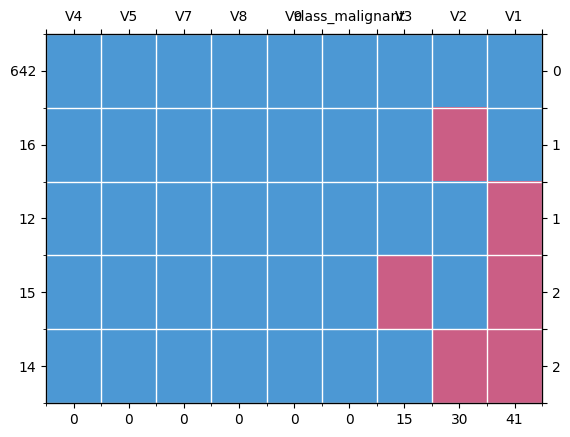

                         row_count  V4  V5  V7  V8  V9  class_malignant  V3  \
rows_no_missing                642   1   1   1   1   1                1   1   
1                               16   1   1   1   1   1                1   1   
2                               12   1   1   1   1   1                1   1   
3                               15   1   1   1   1   1                1   0   
4                               14   1   1   1   1   1                1   1   
n_missing_values_per_col             0   0   0   0   0                0  15   

                          V2  V1  n_missing_values  
rows_no_missing            1   1                 0  
1                          0   1                 1  
2                          1   0                 1  
3                          1   0                 2  
4                          0   0                 2  
n_missing_values_per_col  30  41                86  



Missing rate = 0.2



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


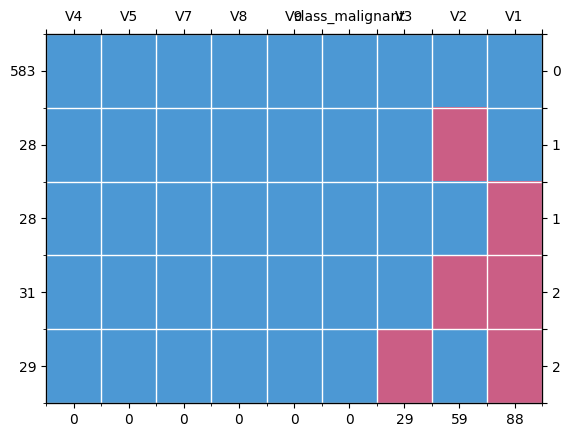

                         row_count  V4  V5  V7  V8  V9  class_malignant  V3  \
rows_no_missing                583   1   1   1   1   1                1   1   
1                               28   1   1   1   1   1                1   1   
2                               28   1   1   1   1   1                1   1   
3                               31   1   1   1   1   1                1   1   
4                               29   1   1   1   1   1                1   0   
n_missing_values_per_col             0   0   0   0   0                0  29   

                          V2  V1  n_missing_values  
rows_no_missing            1   1                 0  
1                          0   1                 1  
2                          1   0                 1  
3                          0   0                 2  
4                          1   0                 2  
n_missing_values_per_col  59  88               176  



Missing rate = 0.3



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


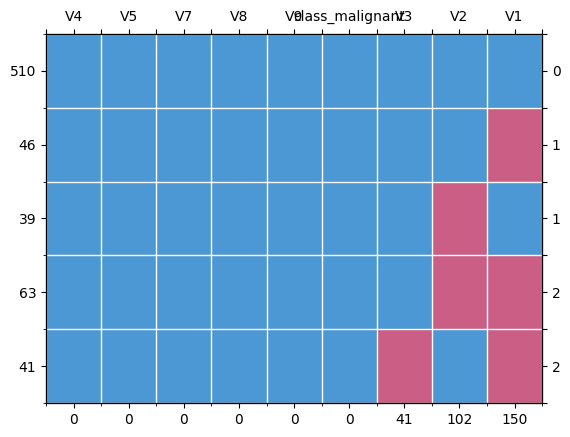

                         row_count  V4  V5  V7  V8  V9  class_malignant  V3  \
rows_no_missing                510   1   1   1   1   1                1   1   
1                               46   1   1   1   1   1                1   1   
2                               39   1   1   1   1   1                1   1   
3                               63   1   1   1   1   1                1   1   
4                               41   1   1   1   1   1                1   0   
n_missing_values_per_col             0   0   0   0   0                0  41   

                           V2   V1  n_missing_values  
rows_no_missing             1    1                 0  
1                           1    0                 1  
2                           0    1                 1  
3                           0    0                 2  
4                           1    0                 2  
n_missing_values_per_col  102  150               293  



Missing rate = 0.4



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


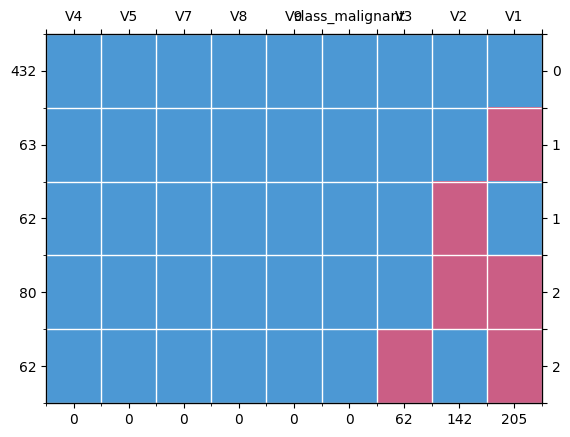

                         row_count  V4  V5  V7  V8  V9  class_malignant  V3  \
rows_no_missing                432   1   1   1   1   1                1   1   
1                               63   1   1   1   1   1                1   1   
2                               62   1   1   1   1   1                1   1   
3                               80   1   1   1   1   1                1   1   
4                               62   1   1   1   1   1                1   0   
n_missing_values_per_col             0   0   0   0   0                0  62   

                           V2   V1  n_missing_values  
rows_no_missing             1    1                 0  
1                           1    0                 1  
2                           0    1                 1  
3                           0    0                 2  
4                           1    0                 2  
n_missing_values_per_col  142  205               409  



Missing rate = 0.5



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


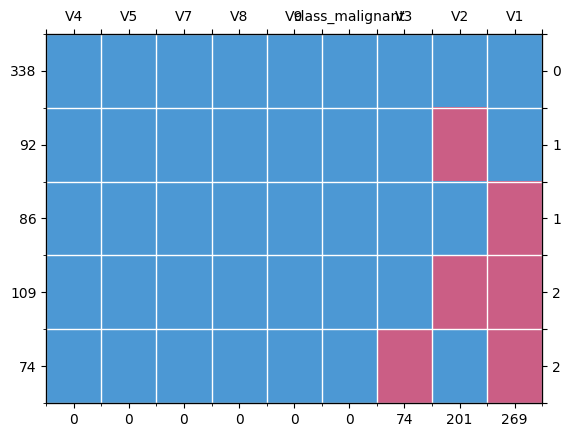

                         row_count  V4  V5  V7  V8  V9  class_malignant  V3  \
rows_no_missing                338   1   1   1   1   1                1   1   
1                               92   1   1   1   1   1                1   1   
2                               86   1   1   1   1   1                1   1   
3                              109   1   1   1   1   1                1   1   
4                               74   1   1   1   1   1                1   0   
n_missing_values_per_col             0   0   0   0   0                0  74   

                           V2   V1  n_missing_values  
rows_no_missing             1    1                 0  
1                           0    1                 1  
2                           1    0                 1  
3                           0    0                 2  
4                           1    0                 2  
n_missing_values_per_col  201  269               544  





In [15]:
# Confirm degree of missingness
for p in props:
    print(f"Missing rate = {p}\n")
    print(mdPatterns().get_patterns(amputed_biopsy[p]))
    print("\n\n")

In [16]:
# Create directory for amputed data if not present yet
biopsy_path = "../../data/toy-dataset/biopsy-processed/"
if not os.path.exists(biopsy_path):
    os.mkdir(biopsy_path)

# Store amputed dataset
for p in props:
    amputed_biopsy[p].to_csv(biopsy_path + "biopsy_{}.csv".format(int(p * 100)), 
                             index=False)

## Perform data amputation (mildly MNAR)

### General setup

In [ ]:
# Set random seed
SEED = 2023

# Set prop of missing values to be constructed
props = [.1, .2, .3, .4, .5]

### `boston` dataset

In [ ]:
# Create general missingness setup

### `biopsy` dataset